# **Canser Classifier**

**Imports:**

In [1]:
from src.homeworks.homework2.KNNClassifier import KNNClassifier
from src.homeworks.homework2.scalers import MinMaxScaler, MaxAbsScaler, StandardScaler, Scaler
from src.homeworks.homework2.score import MetricCalculator
from src.homeworks.homework2.train_test_split import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

**Read cancer.csv:**

In [2]:
data = pd.read_csv("src/homeworks/homework2/notebooks/cancer.csv")
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Replace "M" to 1 and "B" to 0 in "label"**

In [3]:
data["label"] = data["label"].replace({"M": 1, "B": 0})
data.describe()

/tmp/ipykernel_91621/2696528524.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["label"] = data["label"].replace({"M": 1, "B": 0})


,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Divide the dataset into X and y:**

In [4]:
y = data["label"].to_numpy()
X = data.drop(columns=['label']).to_numpy()
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

**Сreat a function that performs normalization, splitting into train and test, and counts metrics.**

In [5]:
def get_score(X, y, test_size: float = 0.15, shuffle: bool = True, random_state: int | None = None, scaler: Scaler = StandardScaler) -> tuple[list[float], ...]:
    scaler = scaler()
    X_new = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, shuffle=True, random_state=random_state)

    accuracy = []
    f1_score = []

    for k in range(1, 21):
        knn = KNNClassifier(k, 5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        metric = MetricCalculator(y_pred, y_test)
        accuracy.append(metric.accuracy())
        f1_score.append(metric.f1_score())
    
    return accuracy, f1_score

## **MinMaxScaler**

In [6]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=MinMaxScaler)

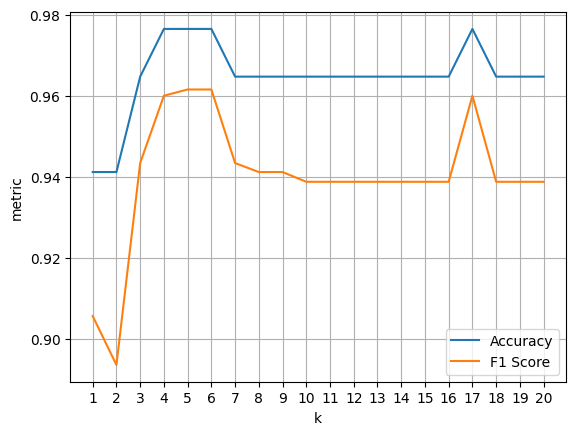

In [7]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()

## **MaxAbsScaler**

In [8]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=MaxAbsScaler)

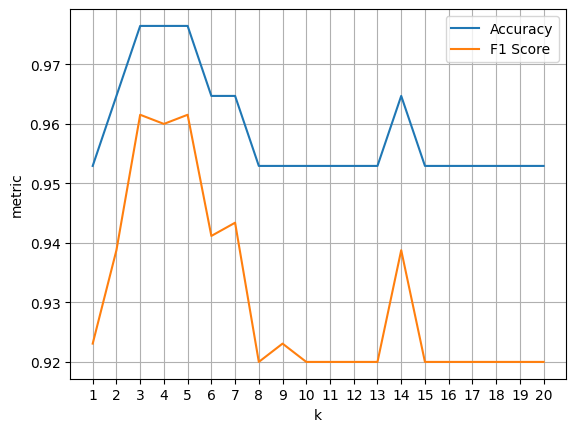

In [9]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()

## **StandardScaler**

In [10]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=StandardScaler)

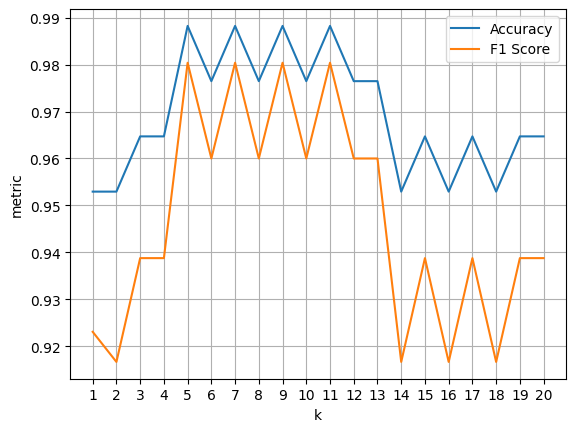

In [11]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()